Pre-processing OCR images

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  


### Determining Figure Size in Inches for Image Display

To determine the appropriate figure size in inches for displaying an image without distortion or loss of detail, you need to consider the image’s resolution (in pixels) and the display's dots per inch (DPI) setting. Here’s how you can calculate it:

#### Step 1: Check the Image Dimensions in Pixels
First, determine the width and height of the image in pixels. For example, if the image is 1200 pixels wide and 800 pixels tall, note these values.

#### Step 2: Choose the DPI (Dots per Inch) Setting
The DPI setting typically defaults to 100 DPI in many environments. For high-quality printing, 300 DPI is standard. But if you are only displaying it on-screen, 100 DPI or 72 DPI may be sufficient.

#### Step 3: Calculate the Size in Inches
Use this formula to convert from pixels to inches:

$$
\text{Width in inches} = \frac{\text{Width in pixels}}{\text{DPI}}
$$

$$
\text{Height in inches} = \frac{\text{Height in pixels}}{\text{DPI}}
$$

In [11]:
def Display(input_path):
    dpi=79

    im_data=plt.imread(input_path)
    height,width=im_data.shape[:2]

    re_size=width/float(dpi), height/float(dpi)
    fig=plt.figure(figsize=re_size)
    ax=fig.add_axes([0, 0, 1, 1])

    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

    

In [ ]:
image_path="data_textbook/page_01.jpg"
img=cv2.imread(image_path)
Display(image_path)

## Invert the image

In [ ]:
image_invert=cv2.bitwise_not(img)
cv2.imwrite("temp/inverted.jpg", image_invert)
Display("temp/inverted.jpg")

## Binary image

1. make it grayscale


In [ ]:
grayscale_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('temp/gray_scale.jpg', grayscale_img)
#Display("temp/gray_scale.jpg")

2. convert it to black&white

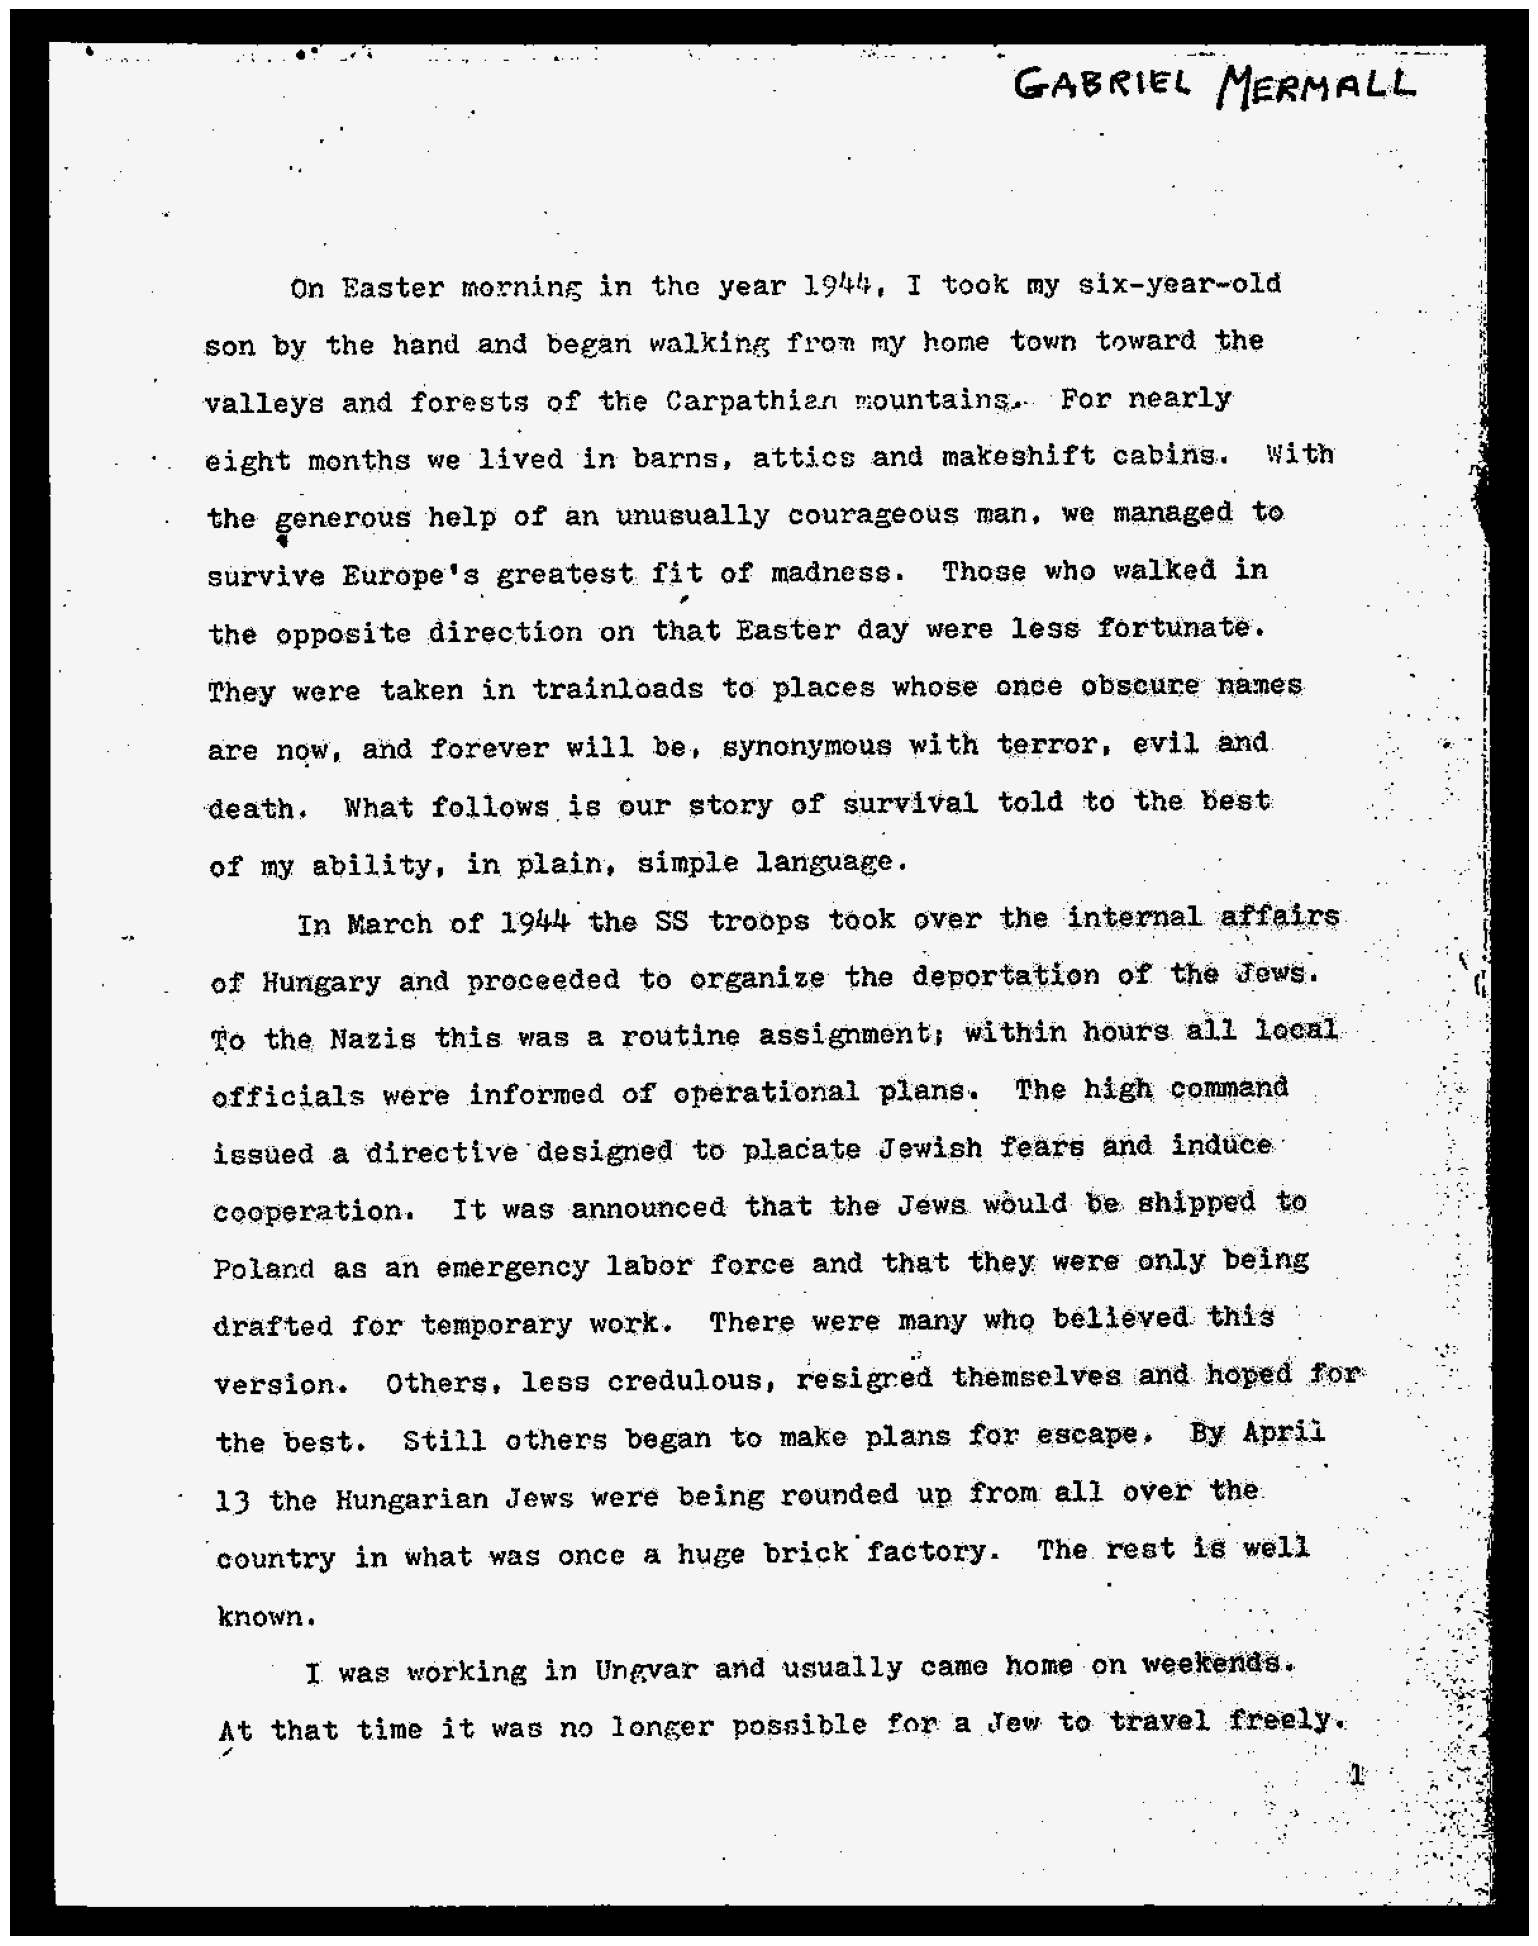

In [25]:
threshold, bin_img=cv2.threshold(grayscale_img, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite('temp/binary_img.jpg', bin_img)
Display("temp/binary_img.jpg")

## Erosion and Dilation in the OCR Process

**Erosion** and **dilation** are image processing techniques used in OCR to enhance text clarity, especially in noisy, broken, or overlapping characters. These are types of **morphological operations** that modify the structure of objects within a binary (black-and-white) image, helping improve OCR accuracy.

### 1. Erosion
   - **What It Does**: Erosion "shrinks" the white regions (foreground) in a binary image by removing pixels from the edges.
   - **How It Works**: In a binary image where text is white on a black background, erosion removes outer pixels from the white regions. This operation can break thin connections between characters or remove small, isolated white spots.
   - **Purpose in OCR**:
     - **Noise Reduction**: Erosion removes small artifacts or specks that could interfere with OCR accuracy.
     - **Separating Characters**: It helps disconnect characters that are too close together, preventing them from being recognized as a single shape.
   - **Example Use Case**: For a scanned image where characters are slightly merged, erosion helps isolate individual letters.

### 2. Dilation
   - **What It Does**: Dilation "expands" the white regions in a binary image by adding pixels to the edges.
   - **How It Works**: Dilation thickens the white regions (text) by adding extra white pixels around each character, making them more prominent.
   - **Purpose in OCR**:
     - **Improving Weak or Broken Text**: Dilation makes faint or thin characters more prominent, helping OCR systems recognize them accurately.
     - **Closing Gaps**: It fills in small breaks or gaps in characters, which may result from printing issues or low resolution, making the text appear more complete.
   - **Example Use Case**: For faint or low-resolution text, dilation increases the visibility of characters for better OCR recognition.

### When to Use Erosion and Dilation
   - **Erosion** is helpful when characters are too thick or connected, as it can thin out text and separate overlapping characters.
   - **Dilation** is useful when text is faint, broken, or too thin, strengthening the characters and making them more distinguishable.
![alt text](image-2.png)

### Combining Erosion and Dilation: Opening and Closing
   - **Opening**: Applying erosion followed by dilation. This combination helps remove small noise while maintaining the main structure of the text.
  
![alt text](image-3.png)


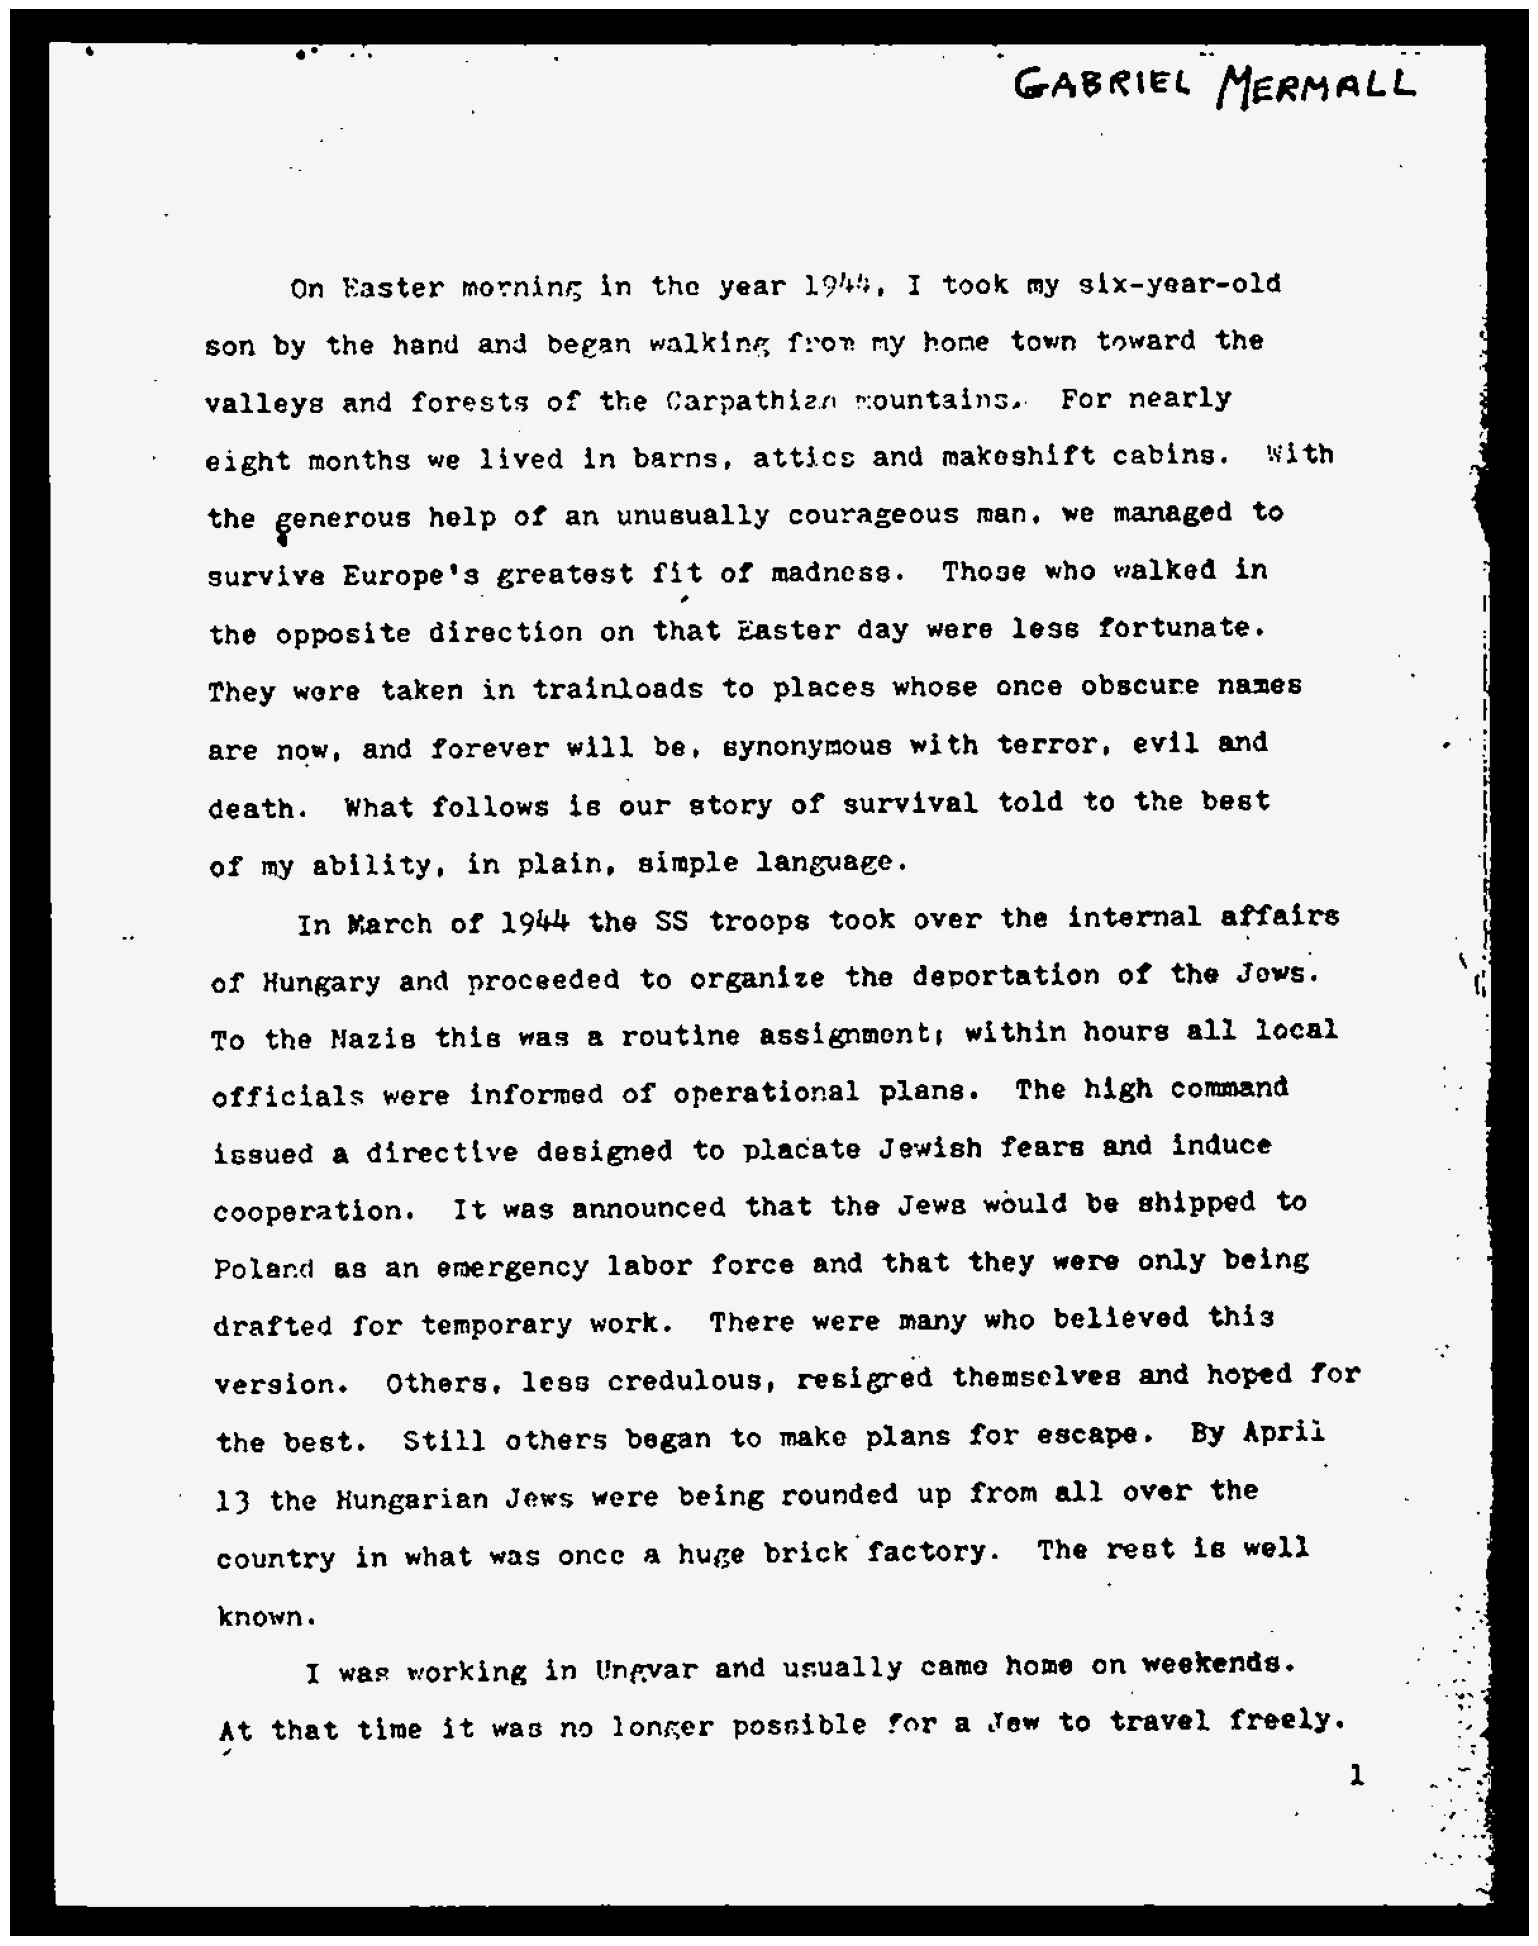

In [ ]:
kernel1=np.ones((1,1), np.uint8)
image1=cv2.erode(bin_img, kernel1, iterations=1)
kernel1=np.ones((1,1), np.uint8)
image1=cv2.dilate(image1, kernel1, iterations=1)

image1 = cv2.morphologyEx(image1, cv2.MORPH_CLOSE, kernel1)
image1 = cv2.medianBlur(image1, 3)


cv2.imwrite('temp/Er_Di.jpg', image1)
Display("temp/Er_Di.jpg")

   - **Closing**: Applying dilation followed by erosion. This fills small gaps in characters and connects close elements without adding noise.

![alt text](image-4.png)

Using these techniques appropriately can significantly improve OCR accuracy, particularly when dealing with challenging text in noisy or low-quality images.

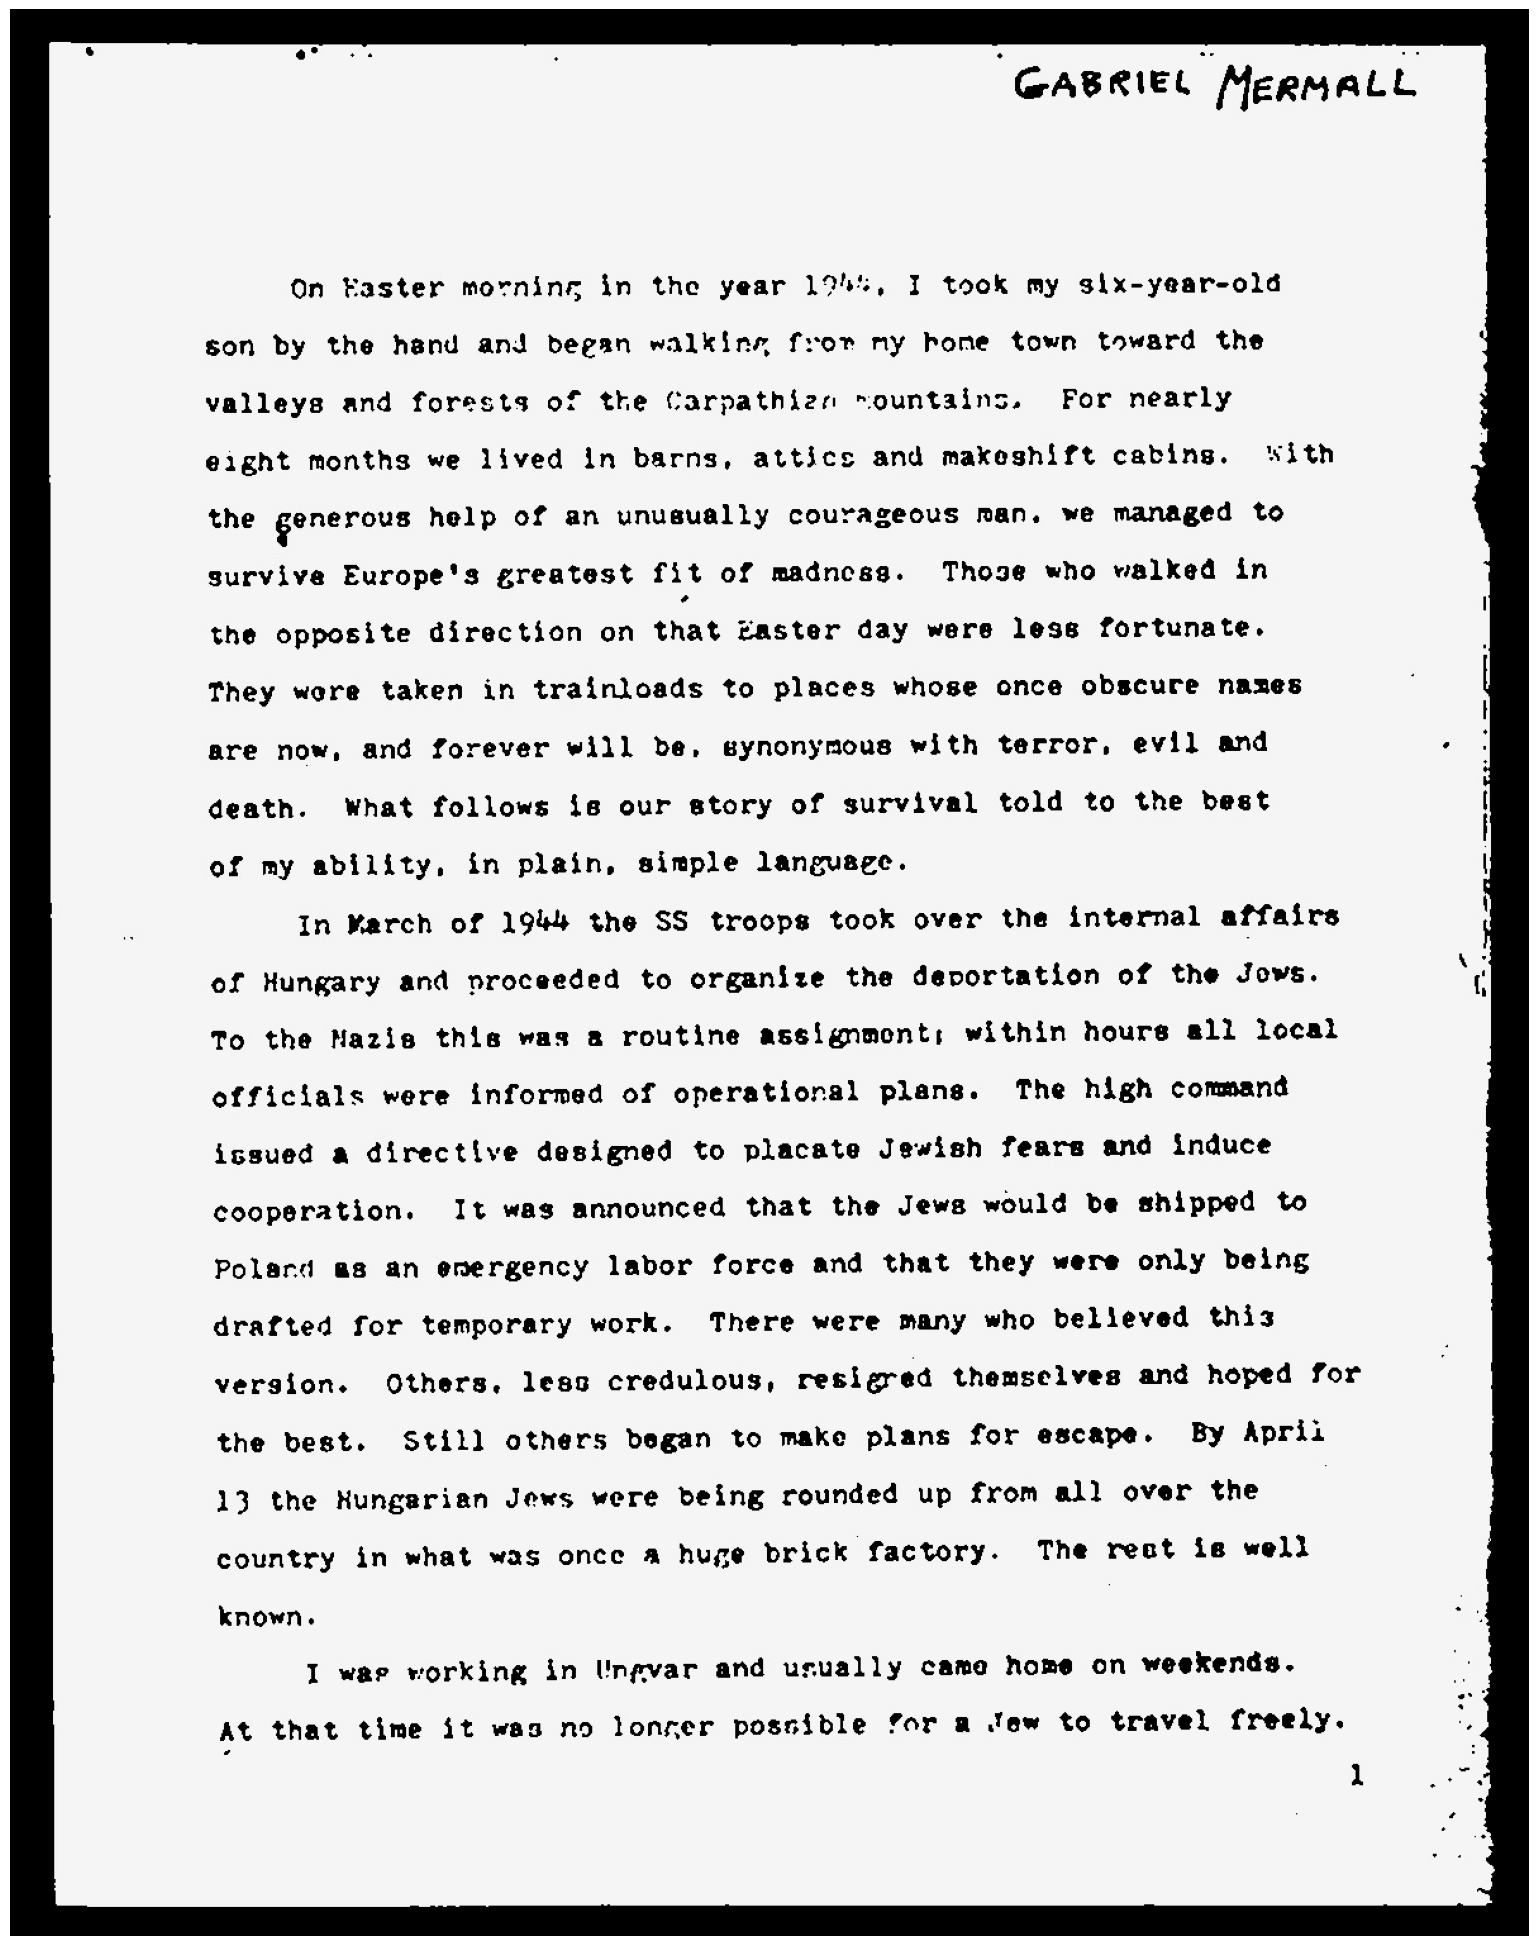

In [28]:
kernel2=np.ones((1,1), np.uint8)
image2=cv2.dilate(bin_img, kernel2, iterations=1)
kernel2=np.ones((1,1), np.uint8)
image2=cv2.erode(image1, kernel2, iterations=1)

image2 = cv2.morphologyEx(image2, cv2.MORPH_CLOSE, kernel2)
image2 = cv2.medianBlur(image2, 3)


cv2.imwrite('temp/Di_Er.jpg', image2)
Display("temp/Di_Er.jpg")